In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
import json
from geneticalgorithm import geneticalgorithm as ga
from scipy.optimize import minimize
from bees_algorithm import BeesAlgorithm

# Загрузка датасета

In [2]:
names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
         'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
         'Histology']
with open('../config.json') as file:
    file_data = json.load(file)
hepatitis_data_path = file_data['hepatitis_data_path']
print(hepatitis_data_path)
hepatitis = pd.read_csv(hepatitis_data_path, header=None, names=names)
# hepatitis = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data', header = None, names = names)
hepatitis.keys()

C:\Users\art_k\PycharmProjects\intelligent_systems\lab_3_4\datasets\hepatitis\hepatitis.data


Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [3]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


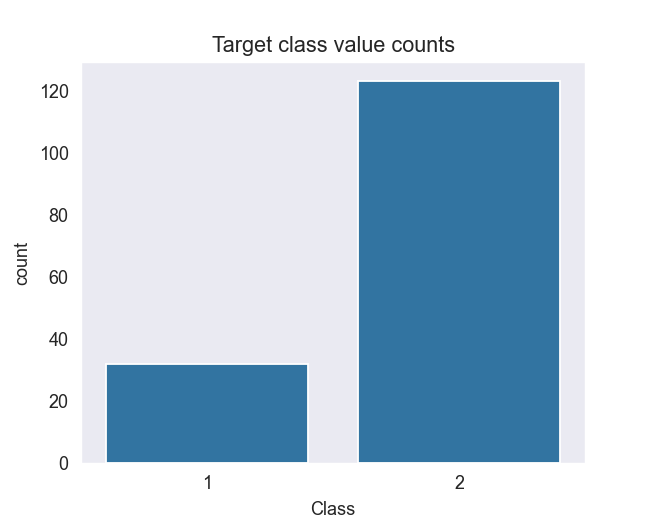

Class
2    123
1     32
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(5, 4), dpi=130)
plt.grid()
sns.countplot(x=hepatitis['Class'])
plt.title("Target class value counts")
plt.show()
# plt.close()
print(hepatitis['Class'].value_counts())

In [5]:
plt.close()
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [6]:
hepatitis.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


# Замена пропущенных значений средними

In [7]:
Bilirubin = hepatitis['Bilirubin']
bilirubin_mean = round(Bilirubin[Bilirubin != '?'].astype(float).mean(), 2)
print('Bilirubin mean = ', bilirubin_mean)

Alk_Phosphate = hepatitis['Alk Phosphate']
Alk_Phosphate_mean = Alk_Phosphate[Alk_Phosphate != '?'].astype(int).mean().astype(int)
print('Alk_Phosphate mean = ', Alk_Phosphate_mean)

Sgot = hepatitis['Sgot']
Sgot_mean = Sgot[Sgot != '?'].astype(int).mean().astype(int)
print('Sgot mean = ', Sgot_mean)

Albumin = hepatitis['Albumin']
Albumin_mean = round(Albumin[Albumin != '?'].astype(float).mean(), 1)
print('Albumin mean = ', Albumin_mean)

Protime = hepatitis['Protime']
Protime_mean = Protime[Protime != '?'].astype(int).mean().astype(int)
print('Protime mean = ', Protime_mean)

hepatitis = hepatitis.replace(
    {'Steroid': {'?': 3}, 'Fatigue': {'?': 3}, 'Malaise': {'?': 3}, 'Anorexia': {'?': 3}, 'Liver Big': {'?': 3},
     'Liver Firm': {'?': 3}, 'Spleen Palpable': {'?': 3}, 'Spiders': {'?': 3}, 'Ascites': {'?': 3}, 'Varices': {'?': 3},
     'Bilirubin': {'?': bilirubin_mean}, 'Alk Phosphate': {'?': Alk_Phosphate_mean}, 'Sgot': {'?': Sgot_mean},
     'Albumin': {'?': Albumin_mean}, 'Protime': {'?': Protime_mean}})
hepatitis

Bilirubin mean =  1.43
Alk_Phosphate mean =  105
Sgot mean =  85
Albumin mean =  3.8
Protime mean =  61


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [8]:
for column in hepatitis.columns:
    if column not in ['Bilirubin', 'Albumin']:
        hepatitis[column] = hepatitis[column].astype('int')
    else:
        hepatitis[column] = hepatitis[column].astype('float')
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [9]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


# Фичи и таргет

In [10]:
hepatitis_features = hepatitis.iloc[:, 1:]
hepatitis_targets = hepatitis.iloc[:, 0]
X = hepatitis.iloc[:, 1:]  # hepatitis_features
y = hepatitis.iloc[:, 0]  # hepatitis_targets

# Нахождение параметров для SVM, KNN и RF с помощью эволюционного алгоритма

In [11]:
X_scaled = MaxAbsScaler().fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# SVM

 The best solution found:                                                                           
 [0.61185475 0.34288865]

 Objective function:
 -0.8205128205128205


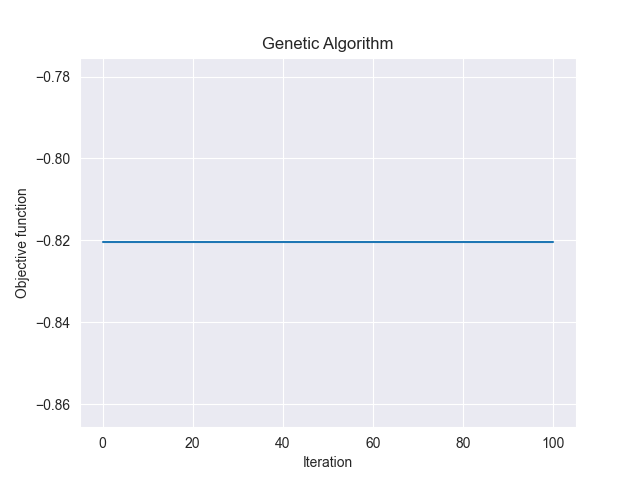

Время выполнения: 12.63s


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from time import time


def score_function(X):
    C = X[0]
    gamma = X[1]
    clf = SVC(C=C, gamma=gamma, kernel='poly')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)


algorithm_param = {'max_num_iteration': 100, 'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}
varbound = np.array([[0.1, 5], [0.0001, 1]])  #params: C and gamma
t1 = time()
model = ga(function=score_function, dimension=2, variable_type='real', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)
try:
    model.run()
except Exception as ex:
    print(ex)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1))



In [14]:
solution = model.output_dict
print(solution)

{'variable': array([0.61185475, 0.34288865]), 'function': -0.8205128205128205}


0.8205128205128205
              precision    recall  f1-score   support

           1       0.80      0.40      0.53        10
           2       0.82      0.97      0.89        29

    accuracy                           0.82        39
   macro avg       0.81      0.68      0.71        39
weighted avg       0.82      0.82      0.80        39



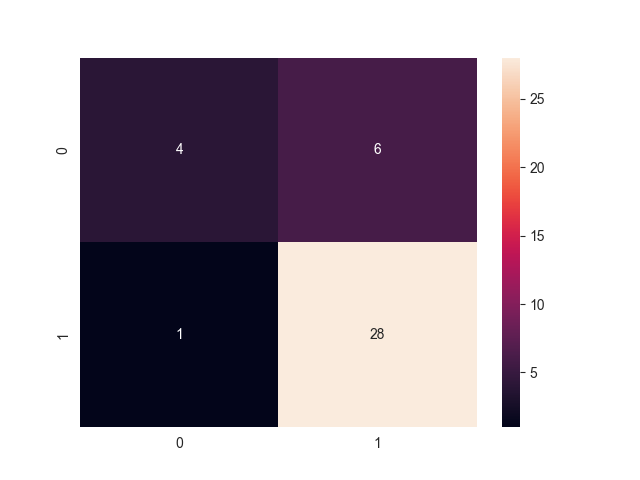

In [15]:
# Проверка найденных параметров
plt.close()
C = solution['variable'][0]
gamma = solution['variable'][1]
clf = SVC(C=C, gamma=gamma, kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
plt.show()

# KNN

 The best solution found:                                                                           
 [ 4. 18.]

 Objective function:
 -0.8974358974358975


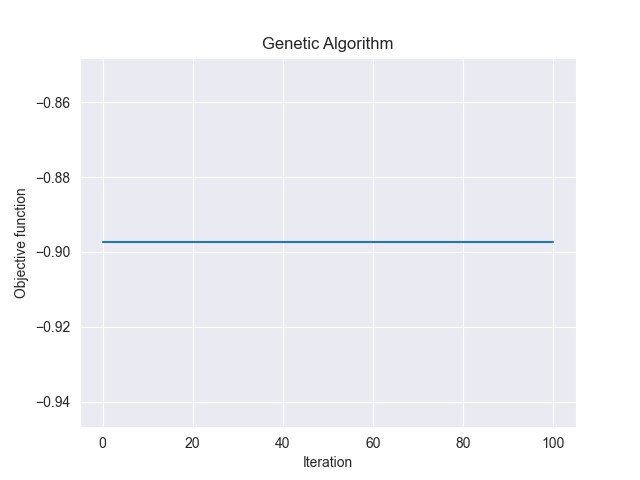

Время выполнения: 40.37s


In [16]:
from sklearn.neighbors import KNeighborsClassifier


def knn_score(X):
    n_neighbors = int(X[0])
    leaf_size = int(X[1])
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric='minkowski', weights='uniform')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)


plt.close()

algorithm_param = {'max_num_iteration': 100, 'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}
varbound = np.array([[1, 5], [10, 30]])  #params: n_neighbors and leaf_size
t1 = time()
model = ga(function=knn_score, dimension=2, variable_type='int', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)
try:
    model.run()
except Exception as ex:
    print(ex)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1))

In [17]:
solution = model.output_dict
print(solution)

{'variable': array([ 4., 18.]), 'function': np.float64(-0.8974358974358975)}


0.8974358974358975
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        10
           2       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



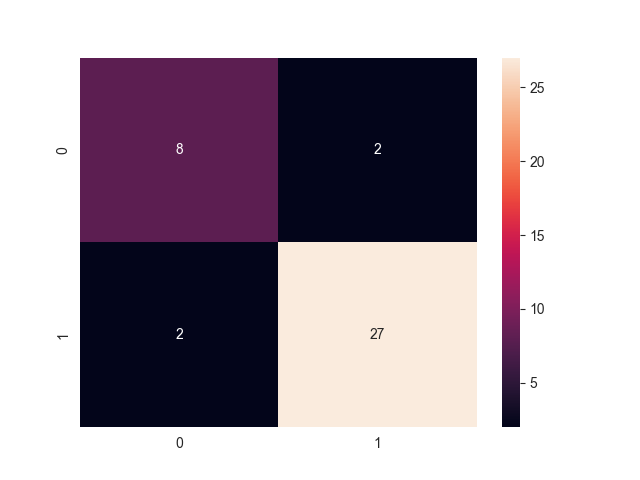

In [18]:
# Проверка найденных параметров
plt.close()
n_neighbors = int(solution['variable'][0])
leaf_size = int(solution['variable'][1])
clf = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric='minkowski', weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
plt.show()

# Random Forest

 The best solution found:                                                                           
 [5. 4. 5. 2.]

 Objective function:
 -0.8974358974358975


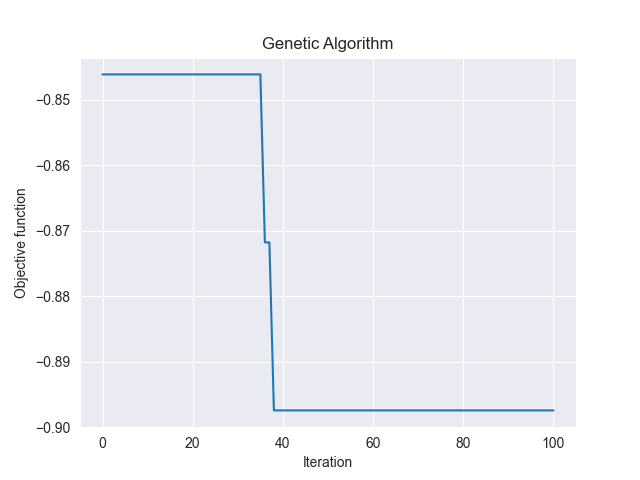

Время выполнения: 35.43s


In [19]:
from sklearn.ensemble import RandomForestClassifier


def rf_score(X):
    n_estimators = int(X[0])
    max_depth = int(X[1])
    min_samples_split = int(X[2])
    min_samples_leaf = int(X[3])
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 bootstrap=True,
                                 random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return -accuracy_score(y_test, y_pred)

plt.close()

algorithm_param = {'max_num_iteration': 100, 'population_size': 100,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}
varbound = np.array([[1, 10], [2, 15],[2,24],[2,7]])  #params
t1 = time()
model = ga(function=rf_score, dimension=4, variable_type='int', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)
try:
    model.run()
except Exception as ex:
    print(ex)
t2 = time()
print("Время выполнения: {:.2f}s".format(t2 - t1))

In [20]:
solution = model.output_dict
print(solution)

{'variable': array([5., 4., 5., 2.]), 'function': np.float64(-0.8974358974358975)}


0.8974358974358975
              precision    recall  f1-score   support

           1       1.00      0.60      0.75        10
           2       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39



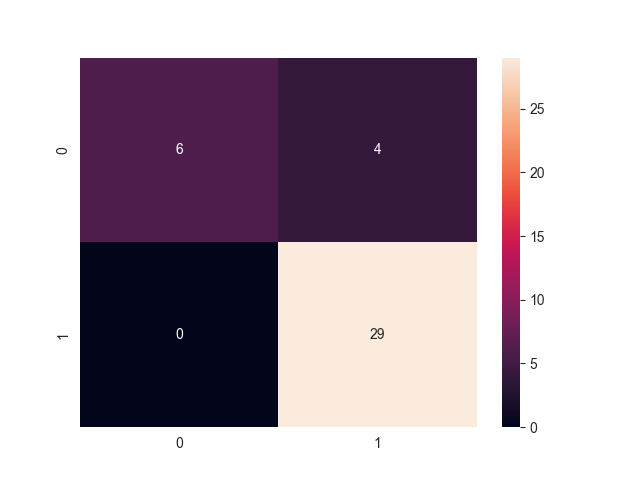

In [21]:
# Проверка найденных параметров
plt.close()
n_estimators = int(solution['variable'][0])
max_depth = int(solution['variable'][1])
min_samples_split = int(solution['variable'][2])
min_samples_leaf = int(solution['variable'][3])

clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 bootstrap=True,
                                 random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
plt.show()